# Google Stock Price Prediction using LSTM

# [](http://) Table of Content 
<hr style='height:2px'>

## 1. What is LSTM?
## 2. Importing Library
## 3. Loading Dataset
## 4. EDA
## 5. Biulding Model
## 6. Prediction
## 7. Evaluate the Model
## 8. Visualizing the Predictions
<hr style='height:2px'>

# 1. What is LSTM ?

* ###  Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

* ### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

* ### LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.

# 2. Importing Library

In [1]:
# Importing all Require Libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam

# 3. Loading The Data

In [2]:
# Load the datasets
train_df = pd.read_csv('Dataset\Google_Stock_Price_Train.csv')
test_df = pd.read_csv('Dataset\Google_Stock_Price_Test.csv')

In [3]:
# Display the first few rows of the training dataset
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
# Convert the 'Date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [7]:
train_df['Close'] = train_df['Close'].str.replace(',','')
train_df['Volume'] = train_df['Volume'].str.replace(',','')

In [8]:
# Convert the 'Close'and 'Volume column to float format
train_df['Close'] = train_df['Close'].astype(float)
train_df['Volume'] = train_df['Volume'].astype(int)

In [9]:
# Display summary statistics
train_df.describe()

,Date,Open,High,Low,Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2014-07-03 20:00:45.786963456,533.709833,537.880223,529.007409,712.669666,3.158107e+06
min,2012-01-03 00:00:00,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,2013-04-05 18:00:00,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,2014-07-05 00:00:00,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,2015-10-01 18:00:00,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,2016-12-30 00:00:00,816.680000,816.680000,805.140000,1216.830000,2.497790e+07
std,NaN,151.904442,153.008811,150.552807,164.752591,2.273726e+06


In [10]:
# check for missing values
train_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# 4. EDA

Time Series Plot of Stock Prices

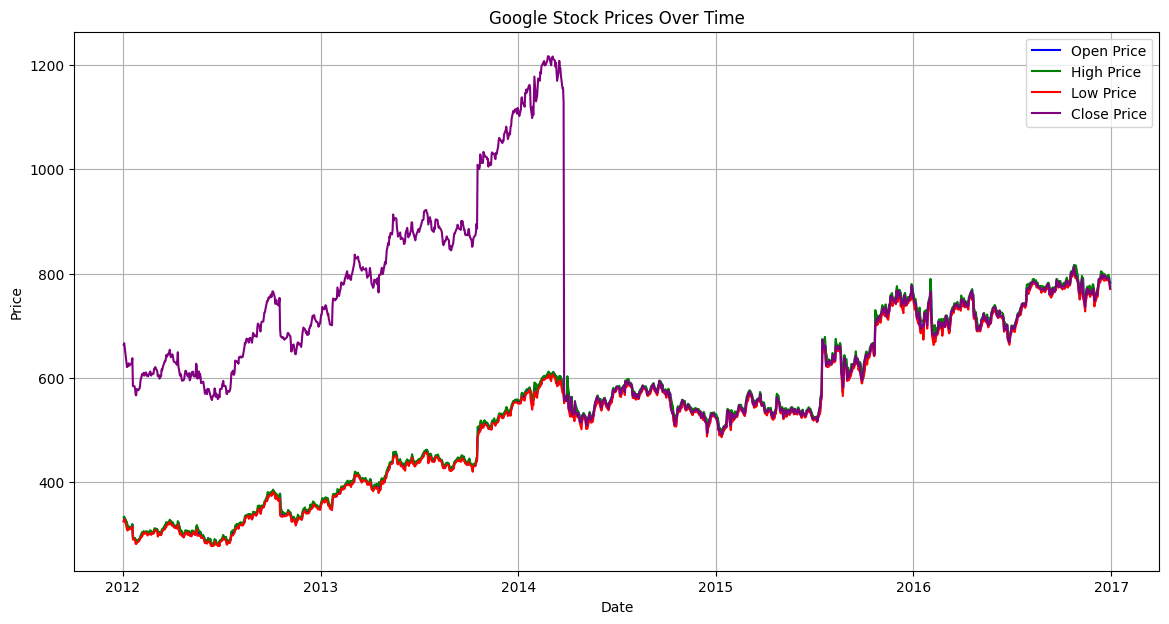

In [11]:
# Visualize the 'Open', 'High', 'Low', and 'Close' prices over time.

# Plot the prices over time
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'], train_df['Open'], label='Open Price', color='blue')
plt.plot(train_df['Date'], train_df['High'], label='High Price', color='green')
plt.plot(train_df['Date'], train_df['Low'], label='Low Price', color='red')
plt.plot(train_df['Date'], train_df['Close'], label='Close Price', color='purple')
plt.title('Google Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

- Trend: The stock prices show an upward trend over the time period with noticeable fluctuations.
- Volatility: There are periods of high volatility where the difference between high and low prices is significant.

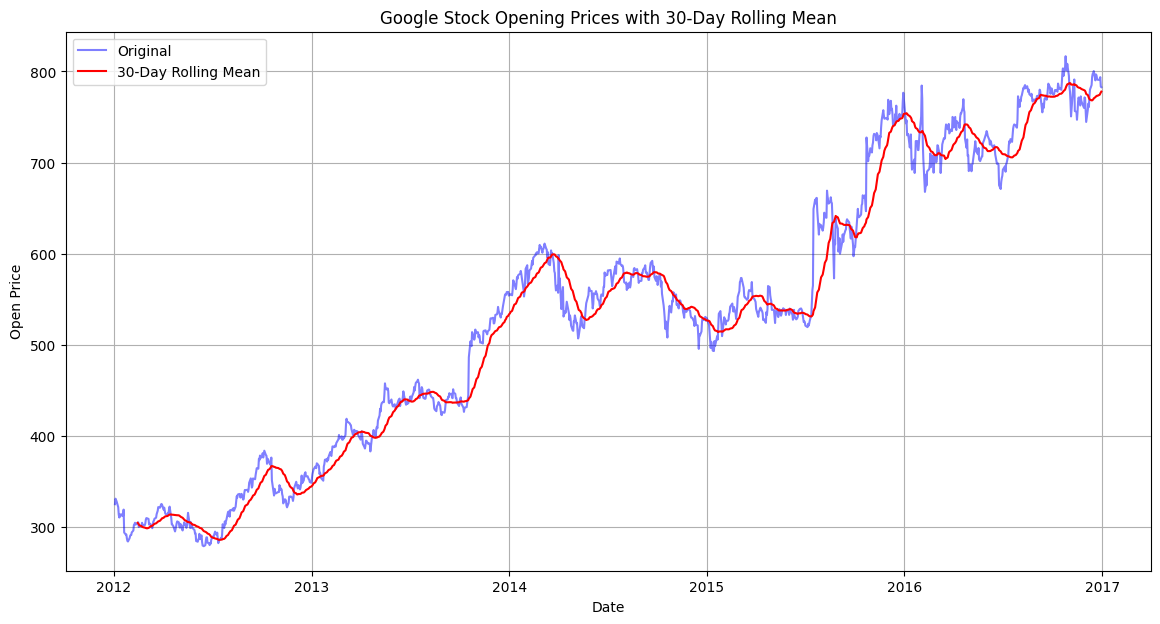

In [12]:
# Plotting the rolling average
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'], train_df['Open'], label='Original', color='blue', alpha=0.5)
plt.plot(train_df['Date'], train_df['Open'].rolling(window=30).mean(), label='30-Day Rolling Mean', color='red')
plt.title('Google Stock Opening Prices with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()


- Smoothed Trend: The rolling average smooths out the short-term fluctuations and highlights the long-term trend.
- Deviation: Points where the actual price deviates significantly from the rolling average could indicate market events or anomalies.

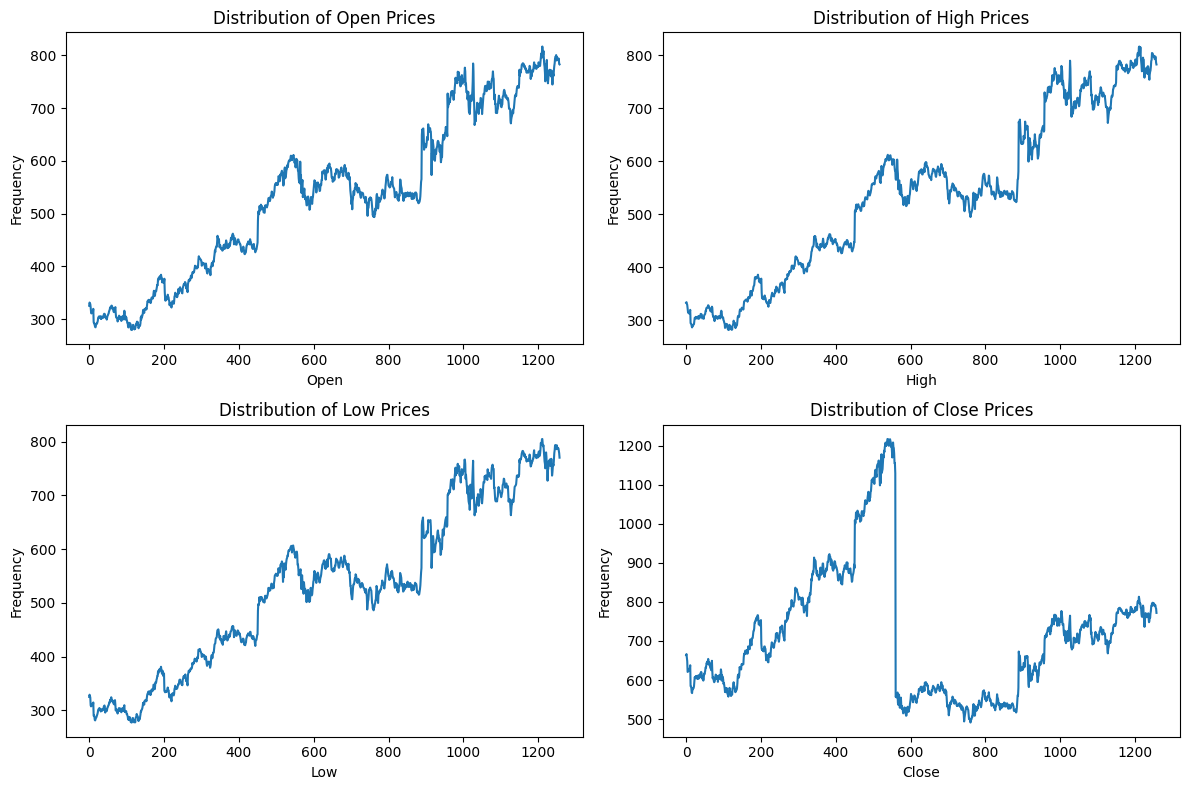

In [13]:
# Plot the distribution of prices
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    plt.plot(train_df[col])
    plt.title(f'Distribution of {col} Prices')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


- Skewness: The distributions of the prices are slightly skewed, with most prices clustered around certain values.
- Normality: The distributions do not perfectly resemble a normal distribution, indicating some skewness in the data.

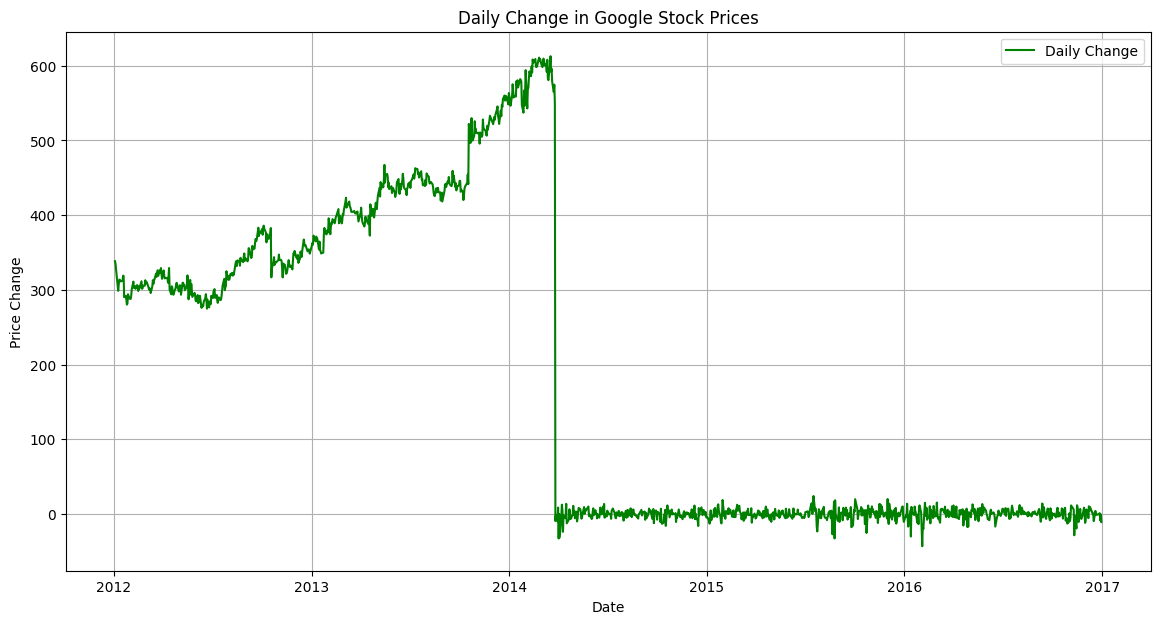

In [14]:
# Plotting the daily price change
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'], train_df['Close'] - train_df['Open'], label='Daily Change', color='green')
plt.title('Daily Change in Google Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.show()


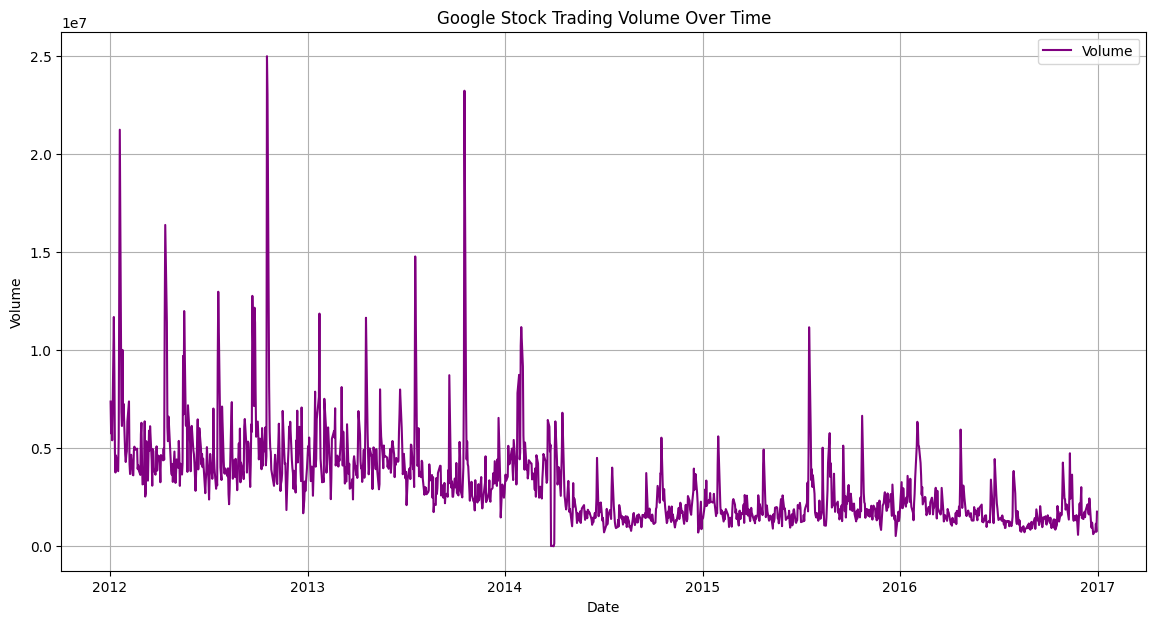

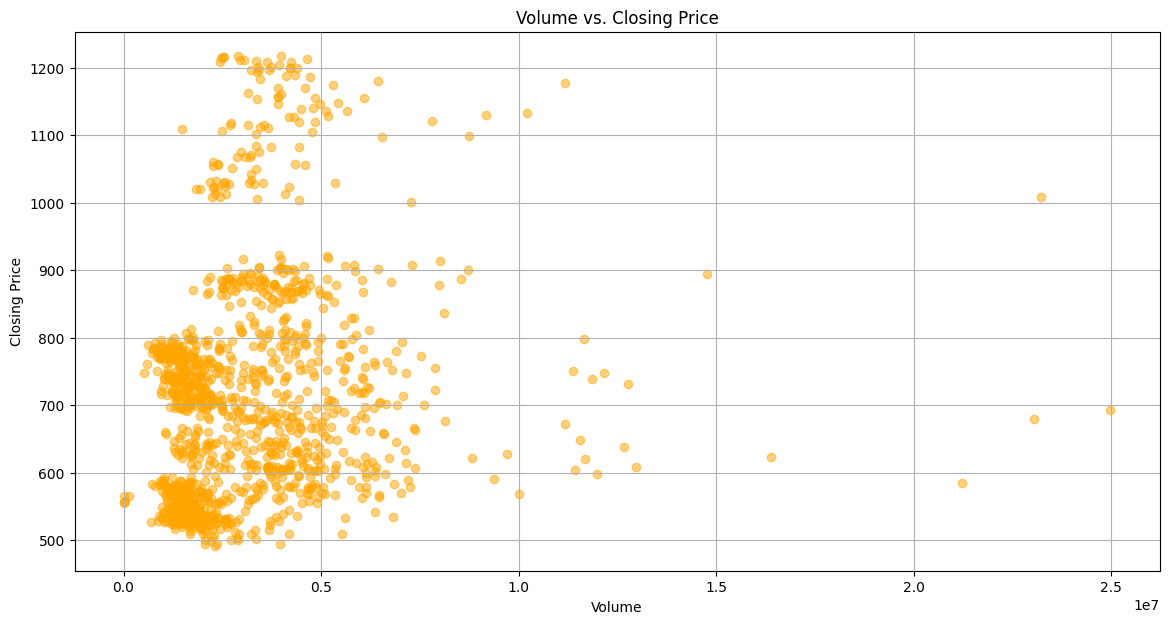

In [15]:
# Plotting Volume over time
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'], train_df['Volume'], label='Volume', color='purple')
plt.title('Google Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Plot Volume vs. Close price
plt.figure(figsize=(14, 7))
plt.scatter(train_df['Volume'], train_df['Close'], color='orange', alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

- Volume Spikes: There are days with unusually high trading volumes, which may indicate important market events.
- Weak Correlation: The scatter plot shows a weak relationship between volume and closing price, suggesting that other factors influence price movements.

# 5. Building Model

1. Data Preparation

In [16]:
# Select the 'Open' price column for prediction
training_set = train_df['Open'].values.reshape(-1, 1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [17]:
# Create sequences and labels for LSTM
X_train = []
y_train = []
timesteps = 60

for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train, y_train

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

In [18]:
# Reshape the data for LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

2. Building the LSTM Model

In [19]:
# Build LSTM Model
def build_lstm(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [20]:
# Train the LSTM Model
model = build_lstm(units=50, dropout_rate=0.2)
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 0.0957
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0064
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0048
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0045
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0035
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0042
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0045
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0036
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0037
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0035
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0033
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0038
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0035
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0031
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - 

# 6. Prediction

In [21]:
# Make predictions for training data
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
train_predict

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step


array([[320.98373],
       [322.07007],
       [322.75958],
       ...,
       [784.5358 ],
       [785.0177 ],
       [783.11707]], dtype=float32)

In [22]:
# Prepare test data
total_data = pd.concat((train_df['Open'], test_df['Open']), axis=0)
total_data_scaled = scaler.transform(total_data.values.reshape(-1, 1))

In [23]:
# Create X_test for the test set
X_test = []
for i in range(len(total_data_scaled) - len(test_df), len(total_data_scaled)):
    X_test.append(total_data_scaled[i-timesteps:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
# Predict stock prices for the test set
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
test_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[780.27747],
       [777.16565],
       [777.9314 ],
       [779.9612 ],
       [783.9626 ],
       [790.5242 ],
       [796.11194],
       [797.8216 ],
       [797.6248 ],
       [797.296  ],
       [797.4079 ],
       [797.5372 ],
       [797.4746 ],
       [797.9341 ],
       [798.7006 ],
       [803.7741 ],
       [811.4229 ],
       [819.3415 ],
       [822.957  ],
       [817.0329 ]], dtype=float32)

- Predictions are made on both the training and test datasets, and the predicted prices are inverse transformed to the original scale.

# 7. Evaluate the Model

In [25]:
# Evaluate performance
# Training RMSE and MAE
train_rmse = np.sqrt(mean_squared_error(training_set[timesteps:], train_predict))
train_mae = mean_absolute_error(training_set[timesteps:], train_predict)

# Test RMSE and MAE
test_rmse = np.sqrt(mean_squared_error(test_df['Open'].values, test_predict))
test_mae = mean_absolute_error(test_df['Open'].values, test_predict)

In [26]:
print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")

Training RMSE: 11.700388582888545
Training MAE: 8.24900981310811
Test RMSE: 15.046051837157528
Test MAE: 13.406754272460939


- The performance of the model is evaluated using RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). Both metrics help assess how well the model is predicting the stock prices

# 8. Visualizing the Predictions

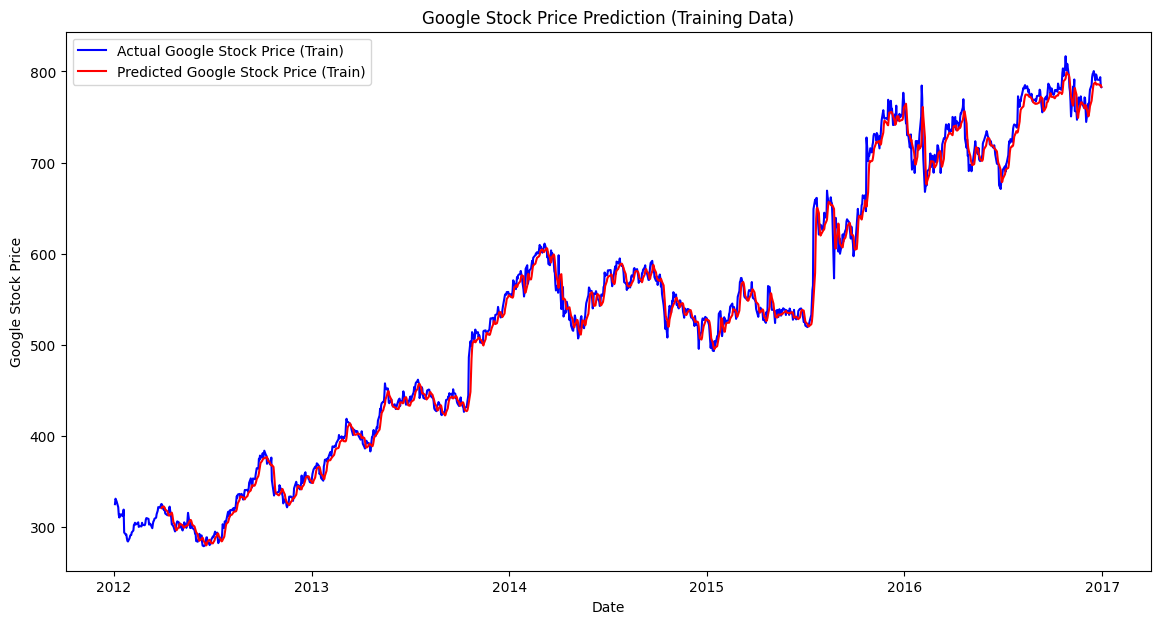

In [27]:
# Plot training predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'], train_df['Open'], color='blue', label='Actual Google Stock Price (Train)')
plt.plot(train_df['Date'][timesteps:], train_predict, color='red', label='Predicted Google Stock Price (Train)')
plt.title('Google Stock Price Prediction (Training Data)')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.grid(True)
plt.show()

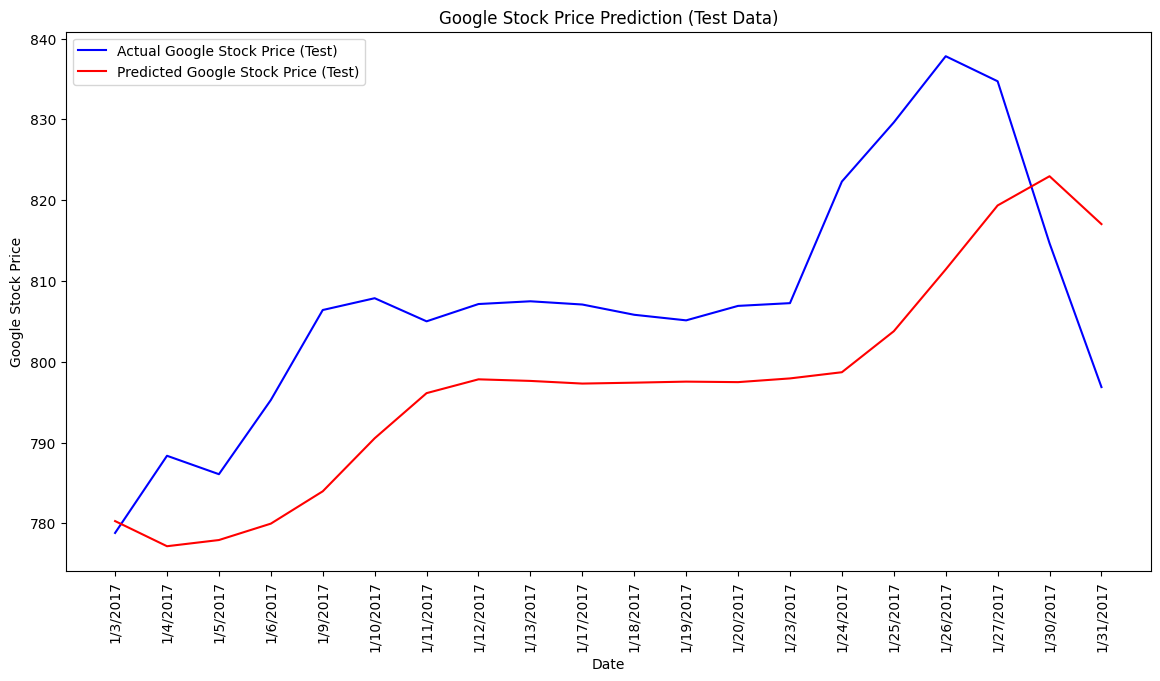

In [28]:
# Plot test predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(test_df['Date'], test_df['Open'], color='blue', label='Actual Google Stock Price (Test)')
plt.plot(test_df['Date'], test_predict, color='red', label='Predicted Google Stock Price (Test)')
plt.title('Google Stock Price Prediction (Test Data)')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

- Plots of actual vs predicted stock prices are displayed for both the training and test data to visualize the model’s performance.